CS21850 Extra Credit

Zack Wang


We wish to solve the system of equations A(dydx) = z, where A is the (n+1) x (n+1) tridiagonal matrix of coefficients, dydx is the (n+1) x 1 column vector of derivatives we wish to solve. z is a (n+1) x 1 column vector of constants that we can solve for using the given $g''$ equation. This systems of equations can be done using numpy.linalg.solve. From this solution, we can generate any particular dydx vector, and represent the spline.

Functions:

makeX: takes in start and end points, num steps, produces evenly spaced mesh

makeInts: takes in xs list, returns list of tuples representing intervals

cubic_spline: takes in xs, ys left and right derivatives, produces the dydx vector

splineEstim: takes in x value, dydx vector, xs, returns the g(x) value using the summation representation

getErr: takes in real function, start and end points, left and right deriv etc... takes the difference btw real function and spline estimate. Then will make a 10x finer mesh, select max of the errors at the points, returning max difference 

In [209]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-whitegrid')


def makeX (start, end, steps):
    #given start and end returns mesh
    scale = (end - start) / steps
    xs = list(map(lambda i: start + (i * scale), range(0, steps+1))) 
    return xs

def makeInts(xs):
    return list(zip(xs[1:], xs))

def cubic_spline(x, y, left, right):
    #makes the array dydx
    h = list(map(lambda a: a[0] - a[1], list(zip(x[1:], x))))
    n = len(x) - 1
    A = np.zeros( (n+1, n+1))
    z = np.zeros( (n+1, 1))
    A[0, 0] = 1
    A[n, n] = 1
    z[0] = left
    z[n] = right
    for i, row in enumerate(A[1:n]):
        #for row with i = 0, we wish to update the zeroth, first, and second val
        A[i+1, i] = -2/h[i]
        A[i+1, i+1] = (-4/h[i+1]) - (4/h[i])
        A[i+1, i+2] = -2/h[i+1]
        z[i+1] = -(y[i] * (-6/((h[i]) ** 2))) - (y[i+1] * ((-6/((h[i+1]) ** 2)) + (6/((h[i]) ** 2)))) - (y[i+2] * ((6/((h[i+1]) ** 2)))) 
    return np.linalg.solve(A, z), A, z

def V0(v):
    return 1 - (3 * (v ** 2)) + (2 * (v ** 3))

def V1(v):
    return (3 * (v ** 2)) - (2 * (v ** 3))

def S0(v):
    return (v) * ((v - 1) ** 2)

def S1(v):
    return (v** 2) * (v - 1)

def splineEstim(point, dy, xs, ys):
    intervals = [(-1, 0)] + makeInts(xs) + [(-1, 0)]
    n = len(xs) - 1
    sum = 0
    for i in range(n+1):
        inte = intervals[i]
        low = inte[1]
        high = inte[0]
        hi = high - low
        if (point >= low) and (point <= high):
            sum += (ys[i] * (V1((point - low) / hi))) + (dy[i] * (hi * S1((point - low) / hi)))
        elif i < len(intervals) - 1:
            nextInte = intervals[i+1]
            lown = nextInte[1]
            highn = nextInte[0]
            hiplus = highn - lown
            if (point >= lown and point <= highn):
                sum += (ys[i] * V0((point - lown) / hiplus)) + (dy[i] * (hiplus * S0((point - lown) / hiplus)))
    return sum

def getErr(estimation, real):
   err = max(list(map(lambda a: abs(a[1] - a[0]), list(zip(estimation, real)))))
   return err
#print(solving(10, makeX(0, 10, 10), list(map(lambda x: x ** 2, makeX(0, 10, 10))), .5, .4))

In [210]:
def solve(leftend, rightend, n ,foo, leftd, rightd):
    return

Run converngece studies for sin(x) and sqrt(x) and plot log of error vs log subintervals

Plot f(x) and smooth cubic spline approx using 4 and 16 intervals

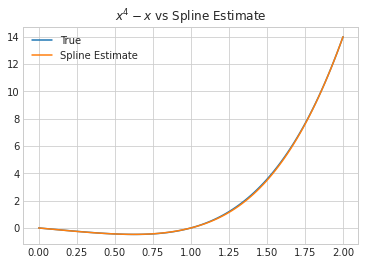

In [211]:
#Problem 1: Plotting Hermite Cubic estimate for f(x) = x^4 - x
xSet = np.linspace(0, 2, 100)
ySet = xSet ** 4 - xSet
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = [0, .5, 1, 2]
y = list(map(lambda d: d ** 4 - d, x)) 
dydx, A, z = cubic_spline(x, list(map(lambda b: b ** 4 - b, x)), -1, 31)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$x^4 - x$ vs Spline Estimate")
plt.show()

We can see that the spline matches perfectly to the actual function. If we remove some of the mesh points, we can see degradation of the quality of estimation. For example, below we remove some points and eliminate some altogether. It roughly follows the correct path, but loses quality near the right end of 2. 

Below we also print out our A matrix, which are the coefficients to the dydx vector, and the righthand side z. 

In [212]:
print("A: ", A)
print("dydx: ", dydx)
print("Z: ", z)

A:  [[  1.   0.   0.   0.]
 [ -4. -16.  -4.   0.]
 [  0.  -4. -12.  -2.]
 [  0.   0.   0.   1.]]
dydx:  [[-1.        ]
 [-0.46590909]
 [ 2.86363636]
 [31.        ]]
Z:  [[ -1. ]
 [  0. ]
 [-94.5]
 [ 31. ]]


/home/zwky/.local/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


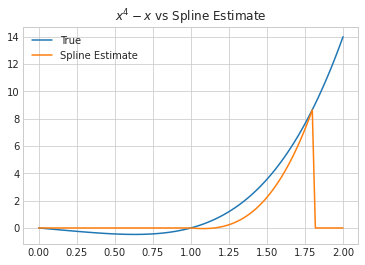

In [213]:
xSet = np.linspace(0, 2, 100)
ySet = xSet ** 4 - xSet
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = [1, 1.8]
y = list(map(lambda d: d ** 4 - d, x)) 
dydx, A, z = cubic_spline(x, list(map(lambda b: b ** 4 - b, x)), -1, 31)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$x^4 - x$ vs Spline Estimate")
plt.show()

For Problems 2 and 3, we set the "real" function to use a mesh of 320 points, and the various stepsizes of our spline estimator to be 4, 8, 16, and 32. The graphs seem to almost perfectly match the function, but we can see from the $log_10$ of the errors that the increase in spline mesh points does improve the estimation. 

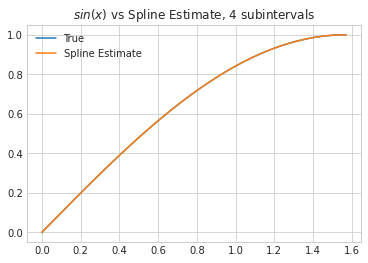

In [214]:
#Problem 2 convergence studies on sin(x), [0, pi/2]

xSet = np.linspace(0, math.pi/2, 320)
ySet = list(map(lambda e: math.sin(e), xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(0, math.pi/2, 4)
y = list(map(lambda d: math.sin(d), x)) 
dydx, A, z = cubic_spline(x, y, 1, 0)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err4 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sin(x)$ vs Spline Estimate, 4 subintervals")
plt.show()

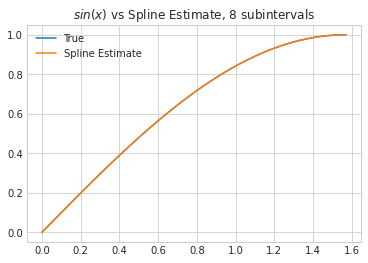

In [215]:
xSet = np.linspace(0, math.pi/2, 320)
ySet = list(map(lambda e: math.sin(e), xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(0, math.pi/2, 8)
y = list(map(lambda d: math.sin(d), x)) 
dydx, A, z = cubic_spline(x, y, 1, 0)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err8 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sin(x)$ vs Spline Estimate, 8 subintervals")
plt.show()

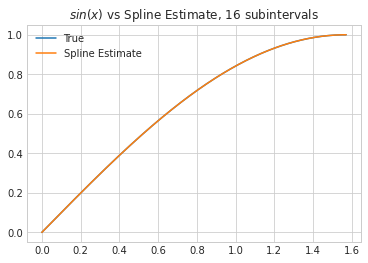

In [216]:
xSet = np.linspace(0, math.pi/2, 320)
ySet = list(map(lambda e: math.sin(e), xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(0, math.pi/2, 16)
y = list(map(lambda d: math.sin(d), x)) 
dydx, A, z = cubic_spline(x, y, 1, 0)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err16 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sin(x)$ vs Spline Estimate, 16 subintervals")
plt.show()

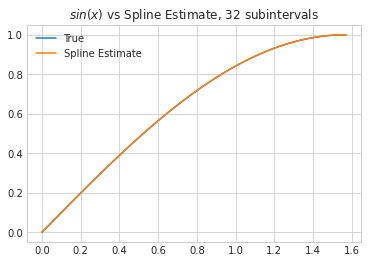

In [217]:
xSet = np.linspace(0, math.pi/2, 320)
ySet = list(map(lambda e: math.sin(e), xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(0, math.pi/2, 32)
y = list(map(lambda d: math.sin(d), x)) 
dydx, A, z = cubic_spline(x, y, 1, 0)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err32 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sin(x)$ vs Spline Estimate, 32 subintervals")
plt.show()

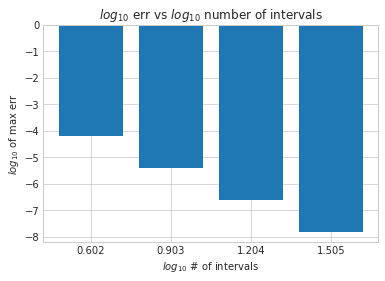

In [218]:
objects = (str(round(math.log10(4), 3)), str(round(math.log10(8), 3)), str(round(math.log10(16), 3)), str(round(math.log10(32), 3)))
plt.bar(objects, [err4, err8, err16, err32])
plt.title("$log_{10}$ err vs $log_{10}$ number of intervals")
plt.xlabel("$log_{10}$ # of intervals")
plt.ylabel("$log_{10}$ of max err")
plt.show()

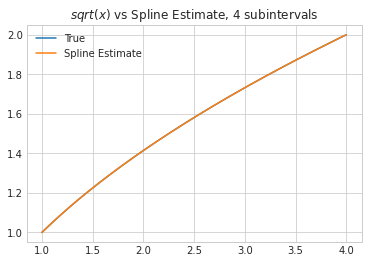

In [219]:
# Problem 3 convergence studies on sin(x), [0, pi/2]

xSet = np.linspace(1, 4, 320)
ySet = list(map(lambda e: e ** .5, xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(1, 4, 4)
y = list(map(lambda d: d ** .5, x)) 
dydx, A, z = cubic_spline(x, y, .5, .25)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err4 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sqrt(x)$ vs Spline Estimate, 4 subintervals")
plt.show()

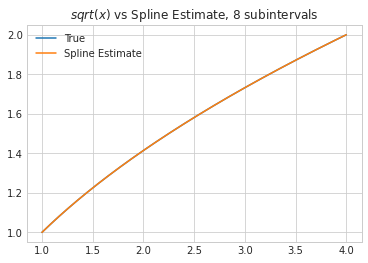

In [220]:
xSet = np.linspace(1, 4, 320)
ySet = list(map(lambda e: e ** .5, xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(1, 4, 8)
y = list(map(lambda d: d ** .5, x)) 
dydx, A, z = cubic_spline(x, y, .5, .25)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err8 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sqrt(x)$ vs Spline Estimate, 8 subintervals")
plt.show()

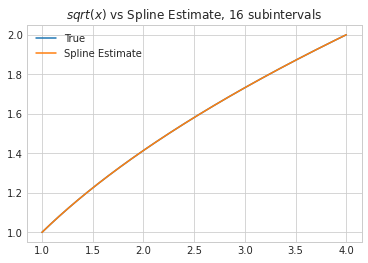

In [221]:
xSet = np.linspace(1, 4, 320)
ySet = list(map(lambda e: e ** .5, xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(1, 4, 16)
y = list(map(lambda d: d ** .5, x)) 
dydx, A, z = cubic_spline(x, y, .5, .25)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err16 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sqrt(x)$ vs Spline Estimate, 16 subintervals")
plt.show()

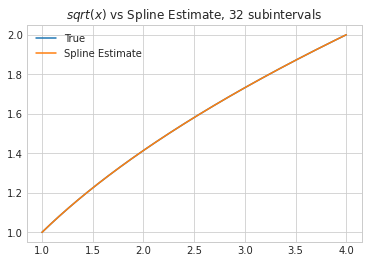

In [222]:
xSet = np.linspace(1, 4, 320)
ySet = list(map(lambda e: e ** .5, xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(1, 4, 32)
y = list(map(lambda d: d ** .5, x)) 
dydx, A, z = cubic_spline(x, y, .5, .25)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate")
err32 = math.log10(getErr(ySet, estimate))
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$sqrt(x)$ vs Spline Estimate, 32 subintervals")
plt.show()

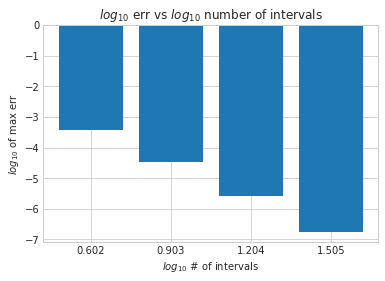

In [223]:
objects = (str(round(math.log10(4), 3)), str(round(math.log10(8), 3)), str(round(math.log10(16), 3)), str(round(math.log10(32), 3)))
plt.bar(objects, [err4, err8, err16, err32])
plt.title("$log_{10}$ err vs $log_{10}$ number of intervals")
plt.xlabel("$log_{10}$ # of intervals")
plt.ylabel("$log_{10}$ of max err")
plt.show()

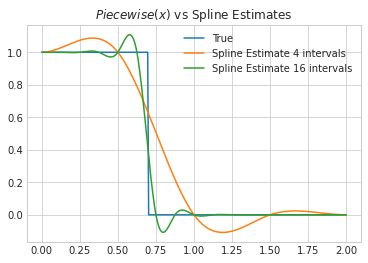

In [224]:
#Problem 4 smooth cubic

def foo(x):
    if x <= .7:
        return 1
    else:
        return 0

xSet = np.linspace(0, 2, 320)
ySet = list(map(foo, xSet))
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True")

#############################
x = makeX(0, 2, 4)
y = list(map(foo, x)) 
dydx, A, z = cubic_spline(x, y, 0, 0)
estimate = list(map(lambda c: splineEstim(c, dydx, x, y), xSet))
plt.plot(xSet, estimate, label = "Spline Estimate 4 intervals")

x2 = makeX(0, 2, 16)
y2 = list(map(foo, x2)) 
dydx2, A2, z2 = cubic_spline(x2, y2, 0, 0)
estimate2 = list(map(lambda c: splineEstim(c, dydx2, x2, y2), xSet))
plt.plot(xSet, estimate2, label = "Spline Estimate 16 intervals")
########################

#what we want to do is open up each of the func values, then for 
plt.legend()
plt.title("$Piecewise(x)$ vs Spline Estimates")
plt.show()



We can see that the rapid change at .7 is quite hard to approximate using the smooth cubic. Adding more intervals helps get the green line a bit closer to the real. 